In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# access the data

df = pd.read_csv('C:\\Users\\reezal93\\Documents\\Data Analyst\\mysql_covid_portfolio\\covid_19_2022_09_26.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
# select numeric columns

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['total_cases' 'new_cases' 'new_cases_smoothed' 'total_deaths'
 'new_deaths' 'new_deaths_smoothed' 'total_cases_per_million'
 'new_cases_per_million' 'new_cases_smoothed_per_million'
 'total_deaths_per_million' 'new_deaths_per_million'
 'new_deaths_smoothed_per_million' 'reproduction_rate' 'icu_patients'
 'icu_patients_per_million' 'hosp_patients' 'hosp_patients_per_million'
 'weekly_icu_admissions' 'weekly_icu_admissions_per_million'
 'weekly_hosp_admissions' 'weekly_hosp_admissions_per_million'
 'total_tests' 'new_tests' 'total_tests_per_thousand'
 'new_tests_per_thousand' 'new_tests_smoothed'
 'new_tests_smoothed_per_thousand' 'positive_rate' 'tests_per_case'
 'total_vaccinations' 'people_vaccinated' 'people_fully_vaccinated'
 'total_boosters' 'new_vaccinations' 'new_vaccinations_smoothed'
 'total_vaccinations_per_hundred' 'people_vaccinated_per_hundred'
 'people_fully_vaccinated_per_hundred' 'total_boosters_per_hundred'
 'new_vaccinations_smoothed_per_million' 'new_people_vaccinate

In [4]:
# select non-numeric columns

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['iso_code' 'continent' 'location' 'date' 'tests_units']


In [5]:
# get a summary of the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219406 entries, 0 to 219405
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    219406 non-null  object 
 1   continent                                   206785 non-null  object 
 2   location                                    219406 non-null  object 
 3   date                                        219406 non-null  object 
 4   total_cases                                 210453 non-null  float64
 5   new_cases                                   210194 non-null  float64
 6   new_cases_smoothed                          208998 non-null  float64
 7   total_deaths                                191365 non-null  float64
 8   new_deaths                                  191290 non-null  float64
 9   new_deaths_smoothed                         190110 non-null  float64
 

In [6]:
# make a list of missing data percentages for each feature

for col in df.columns:
    pct_missing = np.round(np.mean(df[col].isnull())*100,2)
    print('{} - {}%'.format(col, pct_missing))

iso_code - 0.0%
continent - 5.75%
location - 0.0%
date - 0.0%
total_cases - 4.08%
new_cases - 4.2%
new_cases_smoothed - 4.74%
total_deaths - 12.78%
new_deaths - 12.81%
new_deaths_smoothed - 13.35%
total_cases_per_million - 4.52%
new_cases_per_million - 4.64%
new_cases_smoothed_per_million - 5.18%
total_deaths_per_million - 13.21%
new_deaths_per_million - 13.25%
new_deaths_smoothed_per_million - 13.78%
reproduction_rate - 25.08%
icu_patients - 87.28%
icu_patients_per_million - 87.28%
hosp_patients - 86.02%
hosp_patients_per_million - 86.02%
weekly_icu_admissions - 96.71%
weekly_icu_admissions_per_million - 96.71%
weekly_hosp_admissions - 93.51%
weekly_hosp_admissions_per_million - 93.51%
total_tests - 63.82%
new_tests - 65.63%
total_tests_per_thousand - 63.82%
new_tests_per_thousand - 65.63%
new_tests_smoothed - 52.62%
new_tests_smoothed_per_thousand - 52.62%
positive_rate - 56.28%
tests_per_case - 57.0%
tests_units - 51.33%
total_vaccinations - 72.02%
people_vaccinated - 73.25%
people_

<AxesSubplot:>

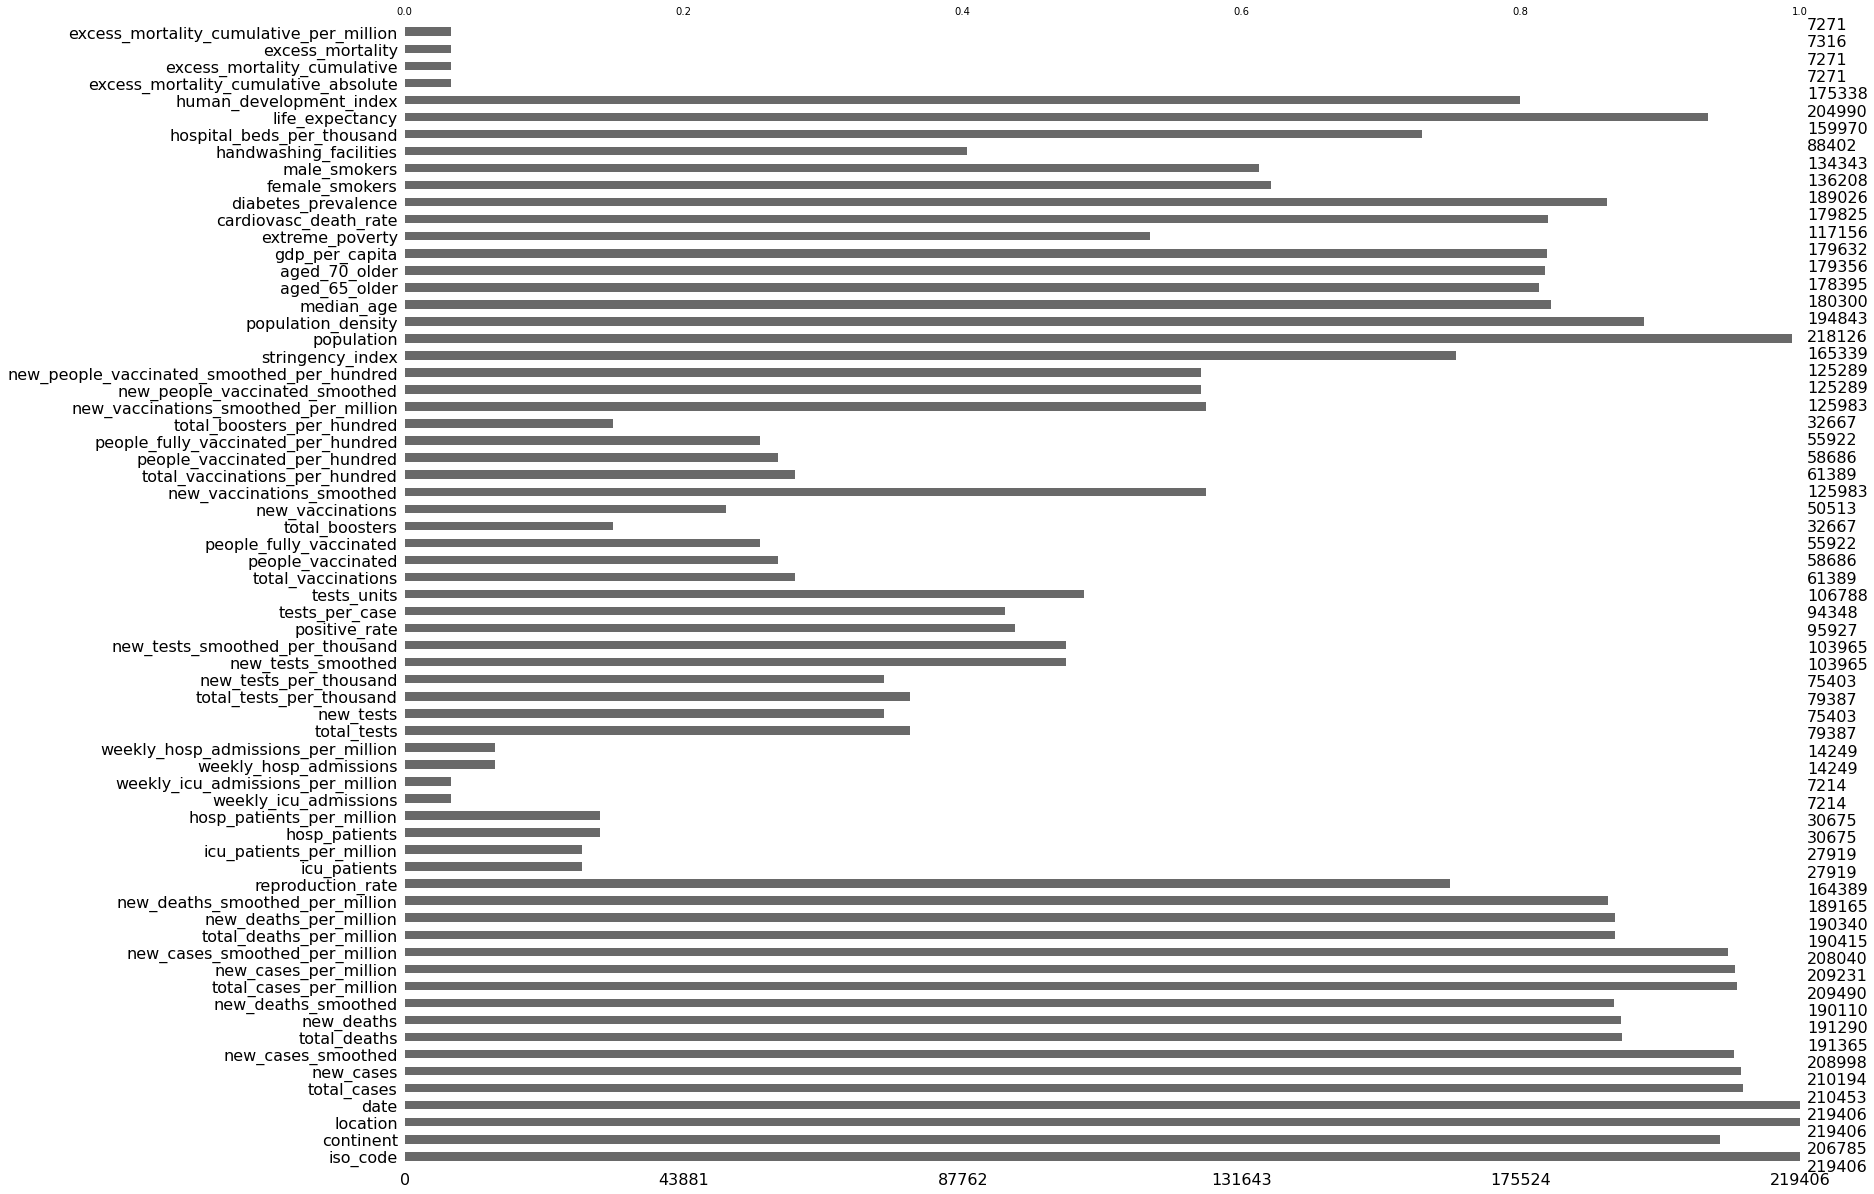

In [7]:
# visualize how complete each column is

msno.bar(df)

In [8]:
# create a missing indicator for each feature with missing data

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

created missing indicator for: continent
created missing indicator for: total_cases
created missing indicator for: new_cases
created missing indicator for: new_cases_smoothed
created missing indicator for: total_deaths
created missing indicator for: new_deaths
created missing indicator for: new_deaths_smoothed
created missing indicator for: total_cases_per_million
created missing indicator for: new_cases_per_million
created missing indicator for: new_cases_smoothed_per_million
created missing indicator for: total_deaths_per_million
created missing indicator for: new_deaths_per_million
created missing indicator for: new_deaths_smoothed_per_million
created missing indicator for: reproduction_rate
created missing indicator for: icu_patients
created missing indicator for: icu_patients_per_million
created missing indicator for: hosp_patients
created missing indicator for: hosp_patients_per_million
created missing indicator for: weekly_icu_admissions
created missing indicator for: weekly_icu

In [9]:
# plot the histogram of missing values based on the indicator

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

<AxesSubplot:xlabel='num_missing', ylabel='count'>

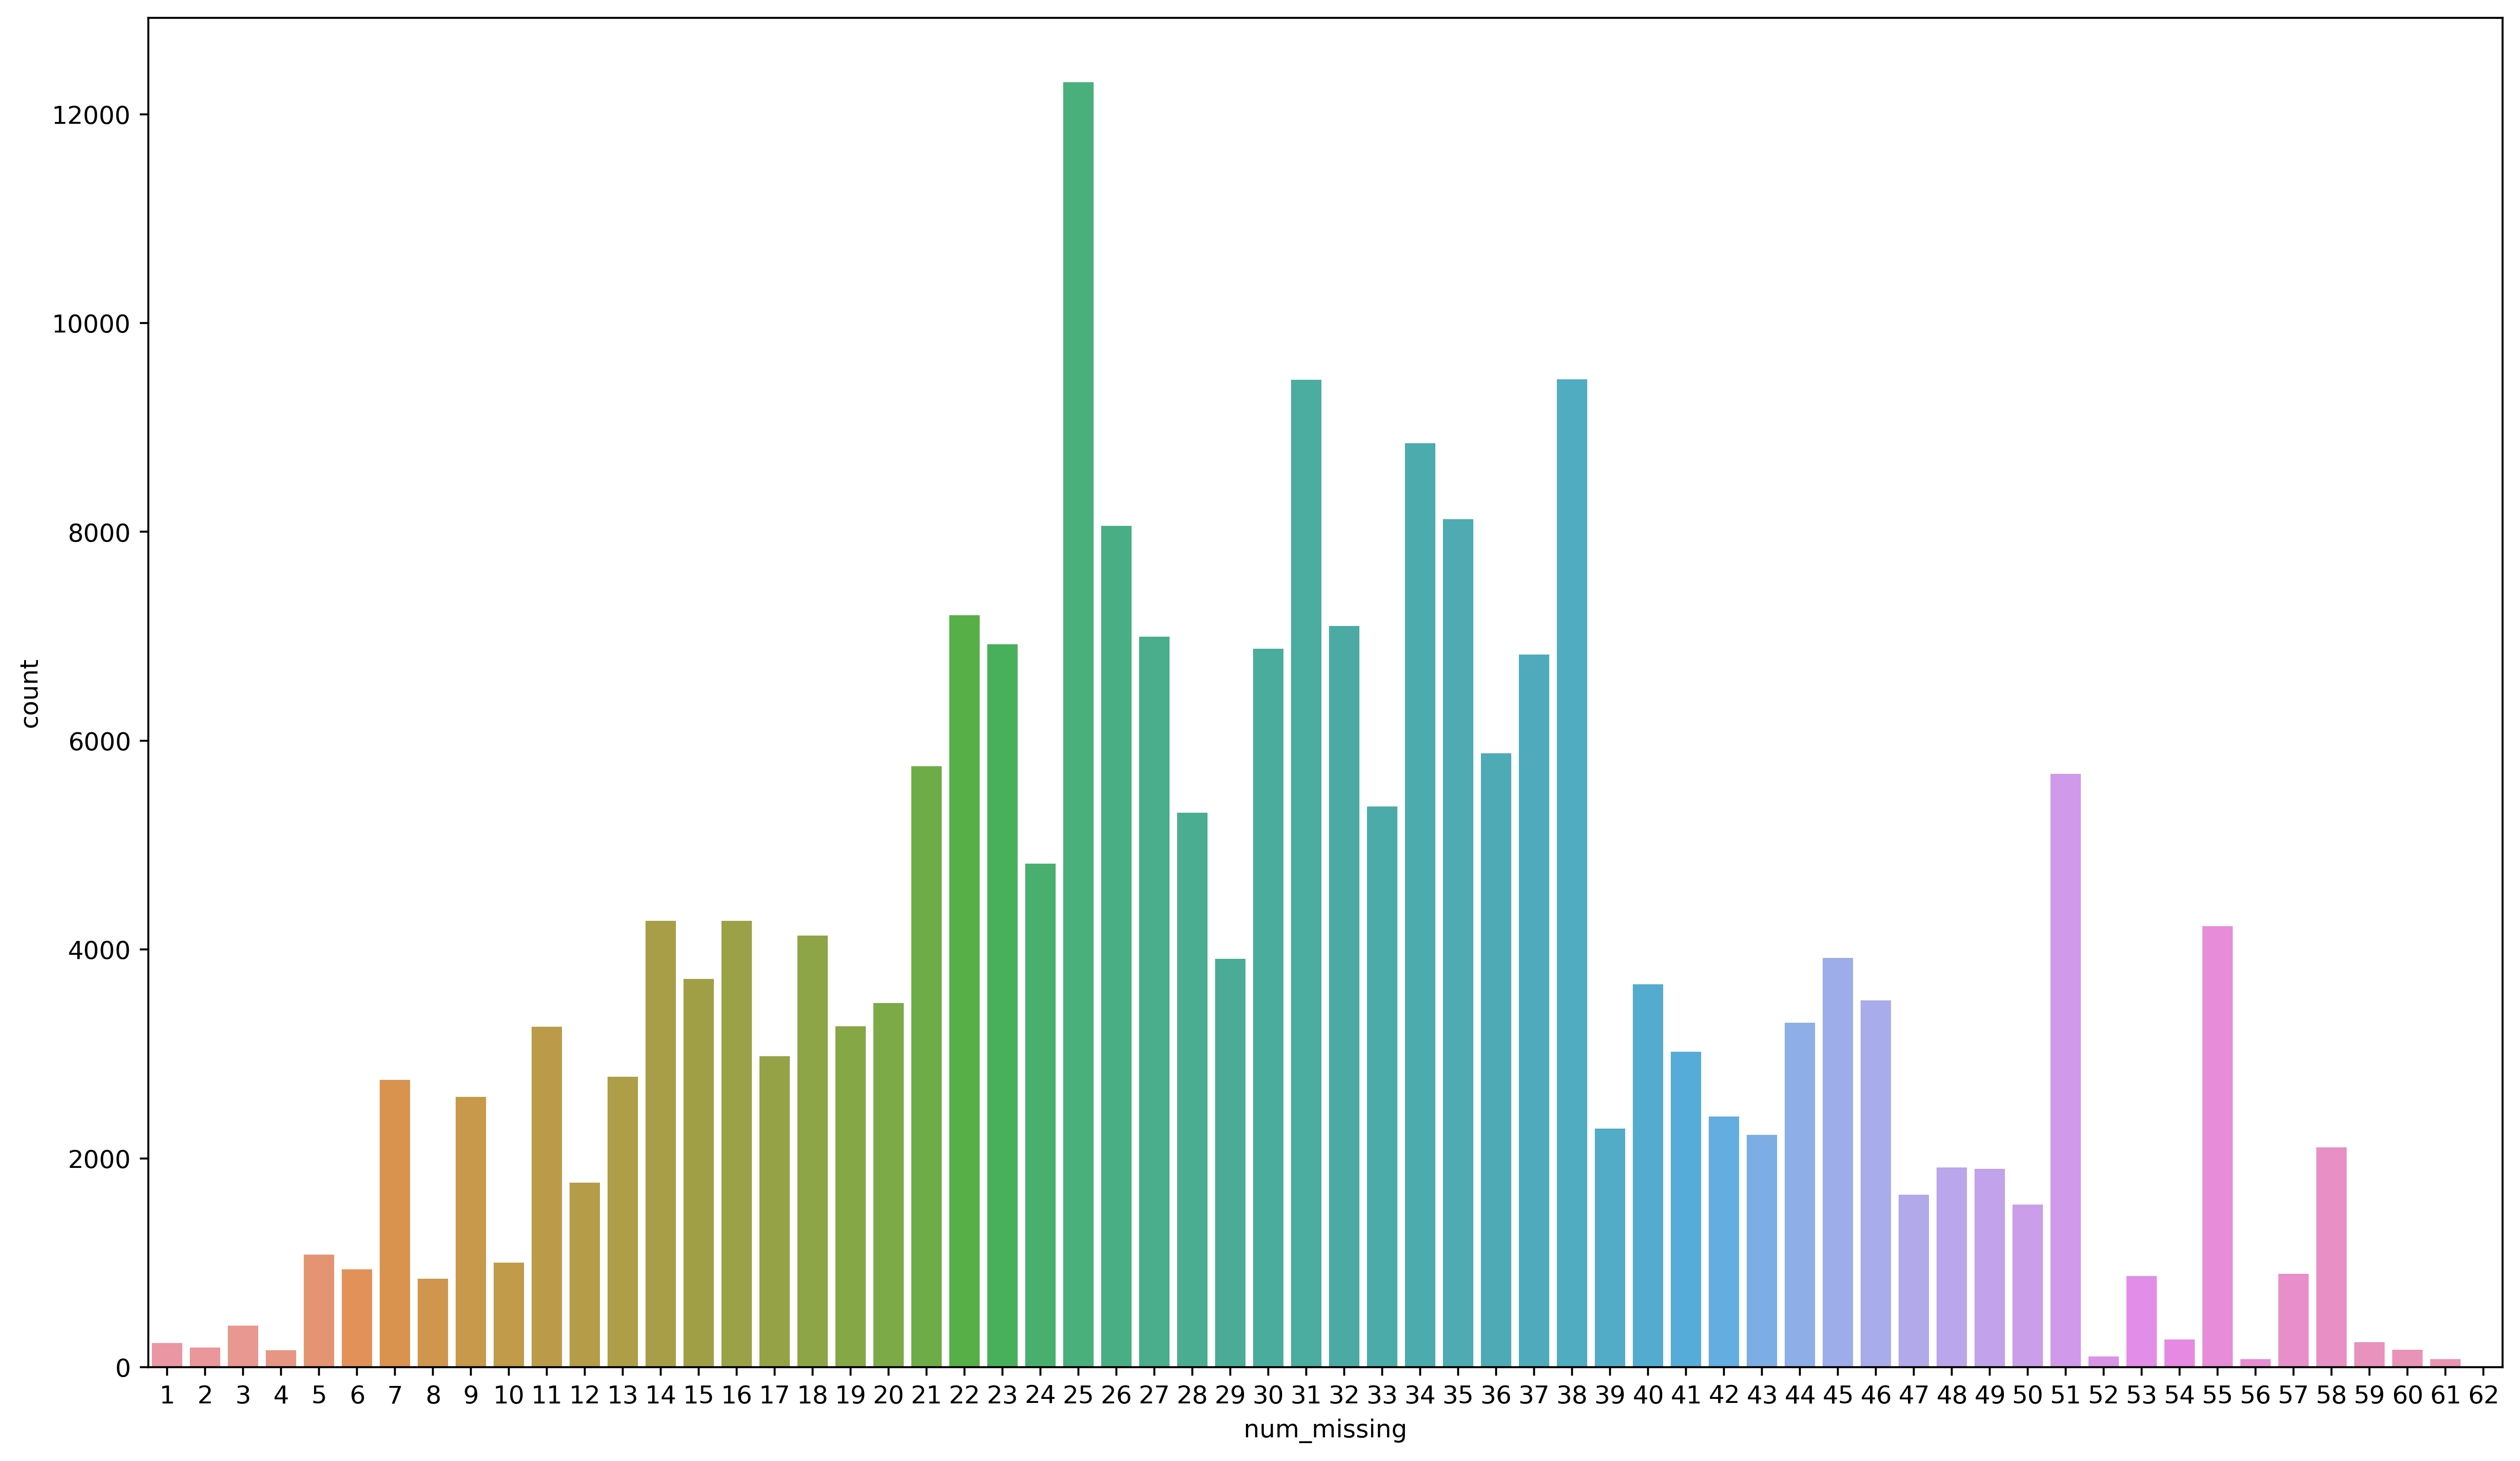

In [10]:
plt.figure(figsize = (17,10), dpi = 400)
sns.countplot(data = df, x = 'num_missing')

In [11]:
# remove the indicators from the data frame

for col in df.columns:
    if 'missing' in col:
        df = df.drop(col, axis = 1)

In [12]:
# get a summary of the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219406 entries, 0 to 219405
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    219406 non-null  object 
 1   continent                                   206785 non-null  object 
 2   location                                    219406 non-null  object 
 3   date                                        219406 non-null  object 
 4   total_cases                                 210453 non-null  float64
 5   new_cases                                   210194 non-null  float64
 6   new_cases_smoothed                          208998 non-null  float64
 7   total_deaths                                191365 non-null  float64
 8   new_deaths                                  191290 non-null  float64
 9   new_deaths_smoothed                         190110 non-null  float64
 

In [13]:
# extract selected columns to a new data frame

df_clean = pd.DataFrame(data = df, columns = ['continent','location','date','total_cases','new_cases','total_deaths',
                                              'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','population'])
df_clean.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,40099462.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0


In [14]:
# create a missing indicator for each feature with missing data

for col in df_clean.columns:
    missing = df_clean[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_clean['{}_ismissing'.format(col)] = missing

created missing indicator for: continent
created missing indicator for: total_cases
created missing indicator for: new_cases
created missing indicator for: total_deaths
created missing indicator for: new_deaths
created missing indicator for: total_vaccinations
created missing indicator for: people_vaccinated
created missing indicator for: people_fully_vaccinated
created missing indicator for: population


In [15]:
# plot the histogram of missing values based on the indicator

ismissing_cols = [col for col in df_clean.columns if 'ismissing' in col]
df_clean['num_missing'] = df_clean[ismissing_cols].sum(axis=1)

<AxesSubplot:xlabel='num_missing', ylabel='count'>

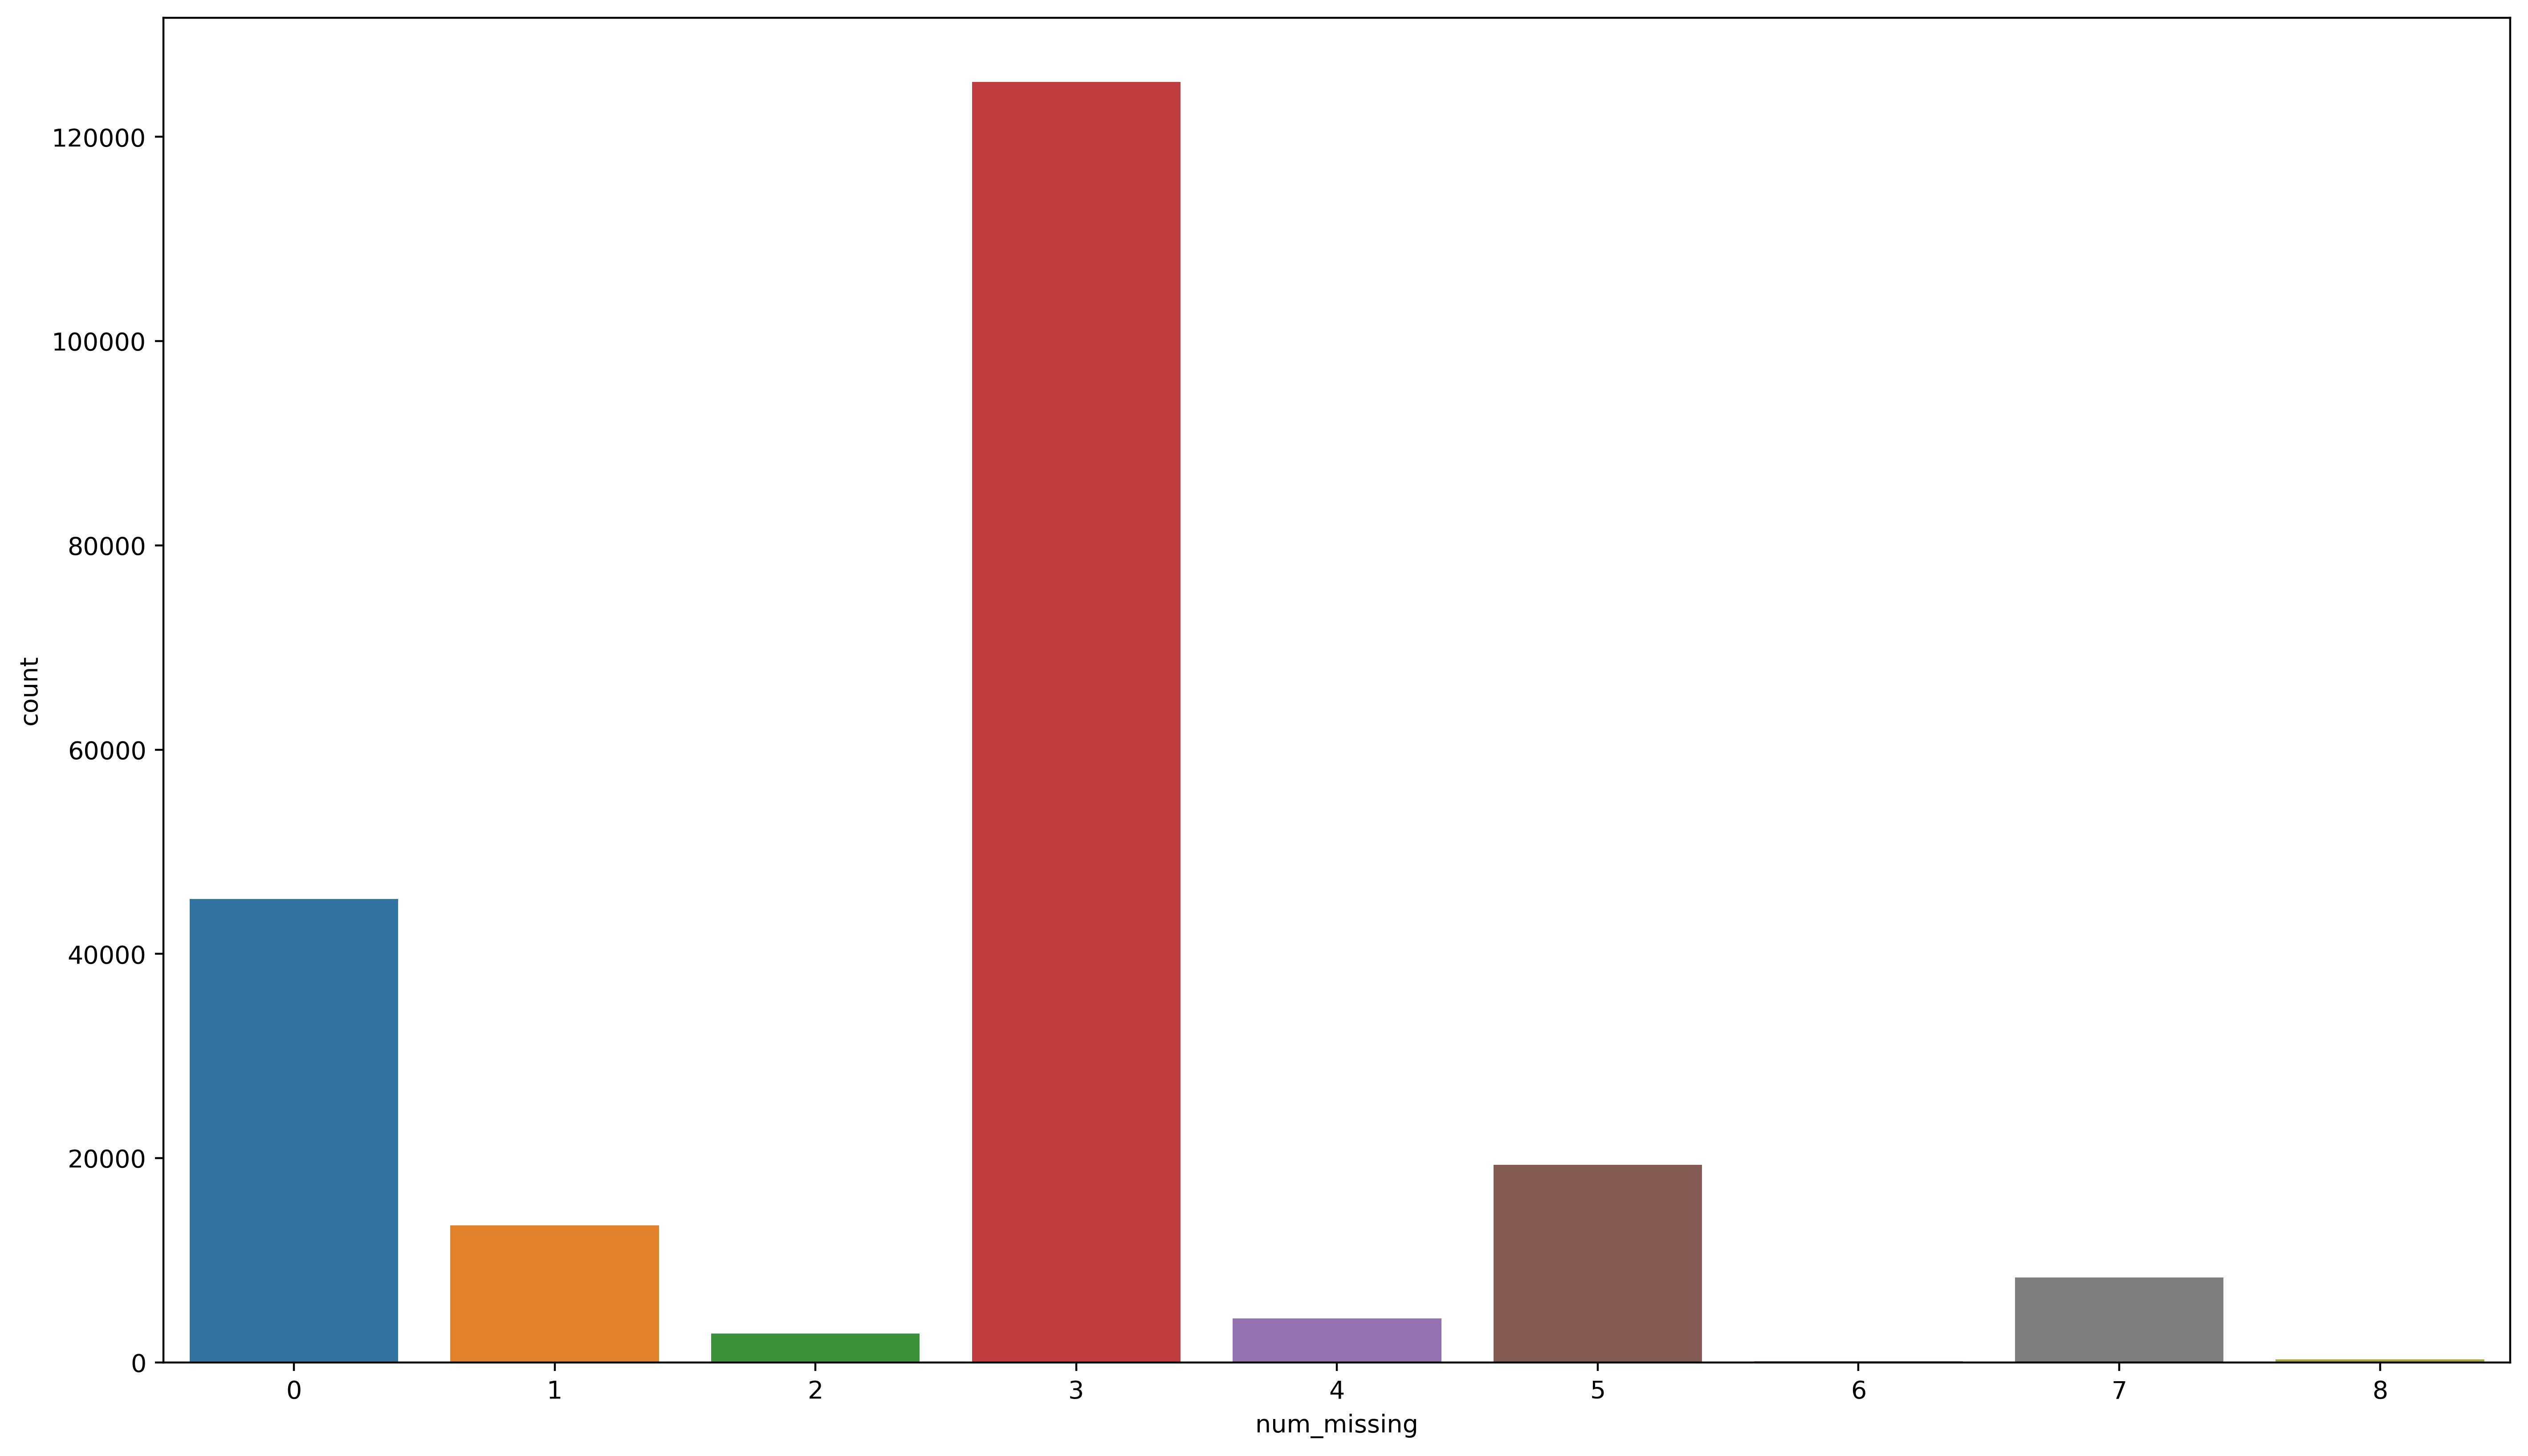

In [16]:
plt.figure(figsize = (17,10), dpi = 400)
sns.countplot(data = df_clean, x = 'num_missing')

In [17]:
# remove the indicators from the data frame

for col in df_clean.columns:
    if 'missing' in col:
        df_clean = df_clean.drop(col, axis = 1)

In [18]:
# get a summary of the data frame

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219406 entries, 0 to 219405
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   continent                206785 non-null  object 
 1   location                 219406 non-null  object 
 2   date                     219406 non-null  object 
 3   total_cases              210453 non-null  float64
 4   new_cases                210194 non-null  float64
 5   total_deaths             191365 non-null  float64
 6   new_deaths               191290 non-null  float64
 7   total_vaccinations       61389 non-null   float64
 8   people_vaccinated        58686 non-null   float64
 9   people_fully_vaccinated  55922 non-null   float64
 10  population               218126 non-null  float64
dtypes: float64(8), object(3)
memory usage: 18.4+ MB


In [19]:
# find duplicate rows

df_clean[df_clean.duplicated(keep='first')]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population


In [20]:
# get a summary of the data frame

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219406 entries, 0 to 219405
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   continent                206785 non-null  object 
 1   location                 219406 non-null  object 
 2   date                     219406 non-null  object 
 3   total_cases              210453 non-null  float64
 4   new_cases                210194 non-null  float64
 5   total_deaths             191365 non-null  float64
 6   new_deaths               191290 non-null  float64
 7   total_vaccinations       61389 non-null   float64
 8   people_vaccinated        58686 non-null   float64
 9   people_fully_vaccinated  55922 non-null   float64
 10  population               218126 non-null  float64
dtypes: float64(8), object(3)
memory usage: 18.4+ MB


In [21]:
# change the data type for one or more columns and extract the date values

df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['weekday'] = df_clean['date'].dt.weekday

In [22]:
# access the first 5 rows

df_clean.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,year,month,weekday
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,40099462.0,2020,2,0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0,2020,2,1
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0,2020,2,2
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0,2020,2,3
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,40099462.0,2020,2,4


In [23]:
# get a summary of the data frame

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219406 entries, 0 to 219405
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   continent                206785 non-null  object        
 1   location                 219406 non-null  object        
 2   date                     219406 non-null  datetime64[ns]
 3   total_cases              210453 non-null  float64       
 4   new_cases                210194 non-null  float64       
 5   total_deaths             191365 non-null  float64       
 6   new_deaths               191290 non-null  float64       
 7   total_vaccinations       61389 non-null   float64       
 8   people_vaccinated        58686 non-null   float64       
 9   people_fully_vaccinated  55922 non-null   float64       
 10  population               218126 non-null  float64       
 11  year                     219406 non-null  int64         
 12  month           

In [24]:
# change data type for one or more columns

for column in df_clean.columns:
    if df_clean[column].dtype == 'float64':
        df_clean[column] = df[column].apply(np.round).astype('Int64')

df_clean.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,year,month,weekday
0,Asia,Afghanistan,2020-02-24,5,5,<NA>,<NA>,<NA>,<NA>,<NA>,40099462,2020,2,0
1,Asia,Afghanistan,2020-02-25,5,0,<NA>,<NA>,<NA>,<NA>,<NA>,40099462,2020,2,1
2,Asia,Afghanistan,2020-02-26,5,0,<NA>,<NA>,<NA>,<NA>,<NA>,40099462,2020,2,2
3,Asia,Afghanistan,2020-02-27,5,0,<NA>,<NA>,<NA>,<NA>,<NA>,40099462,2020,2,3
4,Asia,Afghanistan,2020-02-28,5,0,<NA>,<NA>,<NA>,<NA>,<NA>,40099462,2020,2,4


In [25]:
# get a summary of the data frame

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219406 entries, 0 to 219405
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   continent                206785 non-null  object        
 1   location                 219406 non-null  object        
 2   date                     219406 non-null  datetime64[ns]
 3   total_cases              210453 non-null  Int64         
 4   new_cases                210194 non-null  Int64         
 5   total_deaths             191365 non-null  Int64         
 6   new_deaths               191290 non-null  Int64         
 7   total_vaccinations       61389 non-null   Int64         
 8   people_vaccinated        58686 non-null   Int64         
 9   people_fully_vaccinated  55922 non-null   Int64         
 10  population               218126 non-null  Int64         
 11  year                     219406 non-null  int64         
 12  month           

In [26]:
# add new columns to the existing data frame

df_clean['fatality_rate'] = np.round(100 * df_clean['total_deaths'] / df_clean['total_cases'], 3)
df_clean['infection_rate'] = np.round(100 * df_clean['total_cases'] / df_clean['population'], 3)
df_clean.tail()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,year,month,weekday,fatality_rate,infection_rate
219401,Africa,Zimbabwe,2022-09-22,257259,103,5598,0,<NA>,<NA>,<NA>,15993524,2022,9,3,2.176,1.609
219402,Africa,Zimbabwe,2022-09-23,257289,30,5599,1,<NA>,<NA>,<NA>,15993524,2022,9,4,2.176,1.609
219403,Africa,Zimbabwe,2022-09-24,257318,29,5599,0,<NA>,<NA>,<NA>,15993524,2022,9,5,2.176,1.609
219404,Africa,Zimbabwe,2022-09-25,257340,22,5599,0,<NA>,<NA>,<NA>,15993524,2022,9,6,2.176,1.609
219405,Africa,Zimbabwe,2022-09-26,257342,2,5599,0,<NA>,<NA>,<NA>,15993524,2022,9,0,2.176,1.609


<AxesSubplot:ylabel='fatality_rate'>

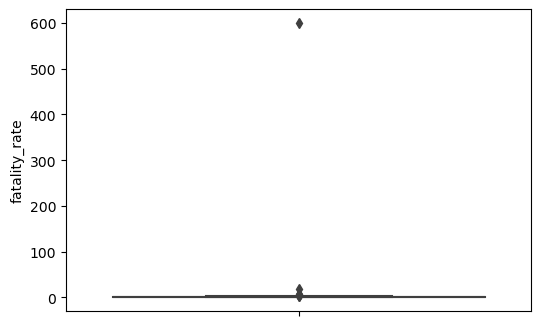

In [27]:
# plot a boxplot

plt.figure(dpi = 100)
sns.boxplot(data = df_clean.loc[df_clean['date'] == '2022-09-26'], y = 'fatality_rate')

<AxesSubplot:ylabel='infection_rate'>

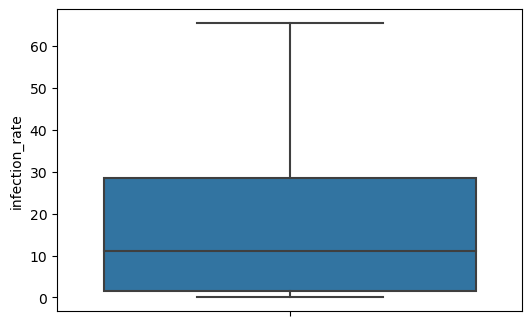

In [28]:
# plot a boxplot

plt.figure(dpi = 100)
sns.boxplot(data = df_clean.loc[df_clean['date'] == '2022-09-26'], y = 'infection_rate')

In [29]:
# filter data frame by column value and get unique values

df_clean[(df_clean['fatality_rate'] >= 500) & (df_clean['date'] == '2022-09-26')]['location'].unique()

array(['North Korea'], dtype=object)

In [30]:
# filter data frame by column value and get a count of unique values

df_clean[(df_clean['fatality_rate'] >= 500) & (df_clean['date'] == '2022-09-26')]['location'].nunique()

1

In [31]:
# filter data frame by column value 

df_clean[(df_clean['fatality_rate'] >= 500) & (df_clean['date'] == '2022-09-26')]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,year,month,weekday,fatality_rate,infection_rate
146131,Asia,North Korea,2022-09-26,1,0,6,0,<NA>,<NA>,<NA>,25971909,2022,9,0,600.0,0.0


In [32]:
# remove outliers

df_clean = df_clean.drop(df_clean[df_clean['location'] == 'North Korea'].index, axis = 0)

In [33]:
df_clean[df_clean['location'] == 'North Korea']

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,year,month,weekday,fatality_rate,infection_rate


<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='fatality_rate'>

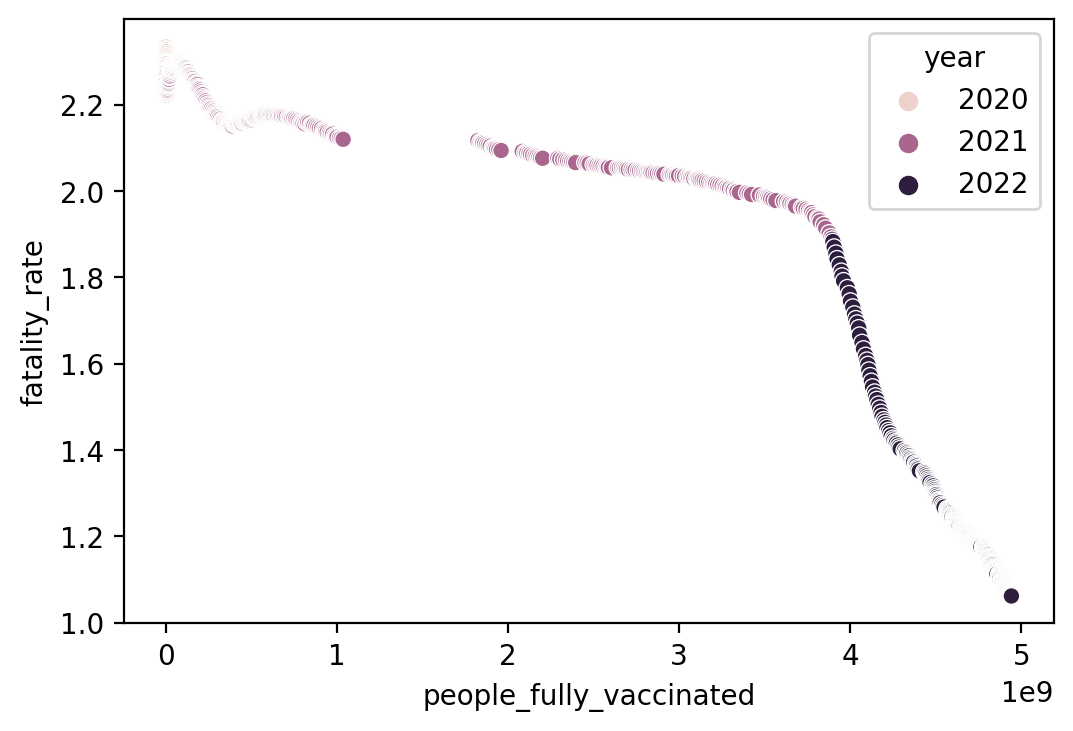

In [34]:
# draw a scatter plot

plt.figure(dpi = 200)

sns.scatterplot(data = df_clean.loc[df_clean['location'] == 'World'], y = 'fatality_rate', x = 'people_fully_vaccinated', hue = 'year')

<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='fatality_rate'>

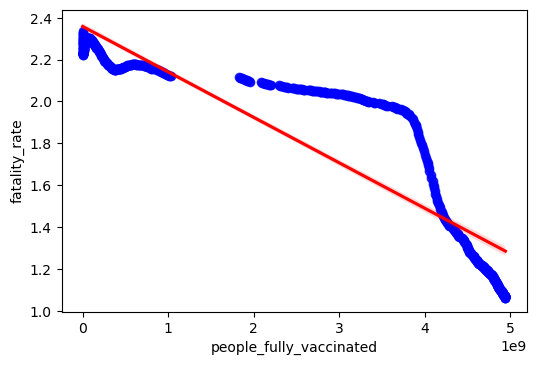

In [35]:
# plot data and a linear regression model fit

df_clean['people_fully_vaccinated'] = df_clean['people_fully_vaccinated'].astype('float64')
df_clean['fatality_rate'] = df_clean['fatality_rate'].astype('float64')

plt.figure(dpi = 100)
sns.regplot(x = 'people_fully_vaccinated', y = 'fatality_rate', data = df_clean.loc[df_clean['location'] == 'World'], scatter_kws = {'color': 'blue'}, line_kws = {'color':'red'})

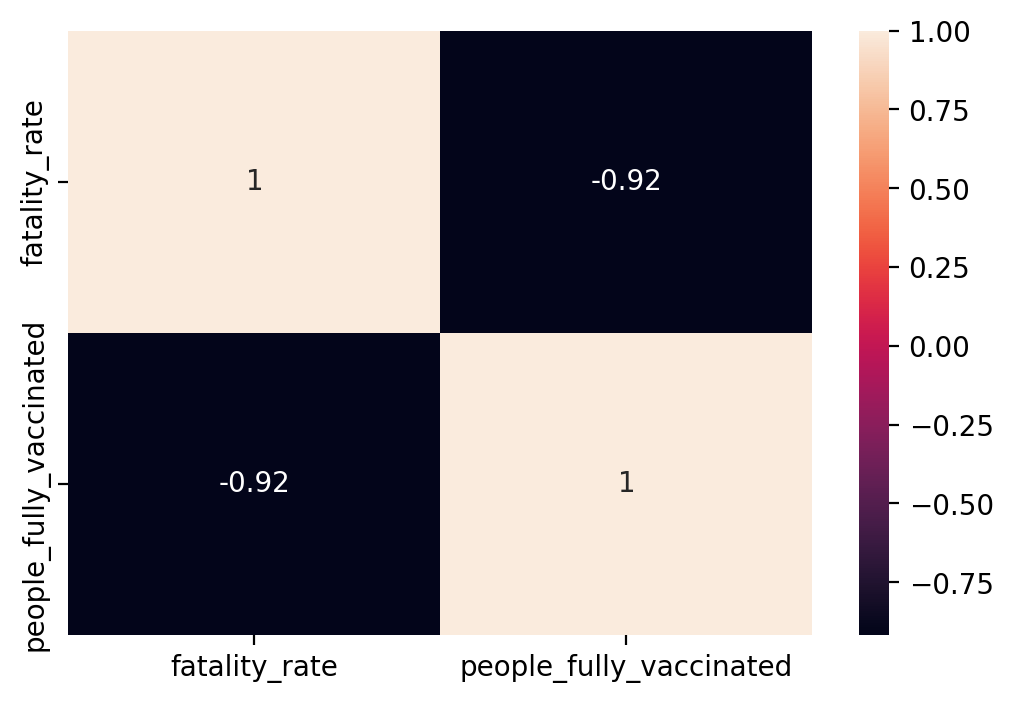

In [36]:
# create a heat map

df_world = df_clean[df_clean['location'] == 'World']

plt.figure(dpi = 200)

correlation_matrix = df_world[['fatality_rate','people_fully_vaccinated']].corr()

sns.heatmap(correlation_matrix, annot = True)

plt.show()


In [37]:
# get the p-value

df_world_clean = df_world[df_world['people_fully_vaccinated'].notnull()]

from scipy import stats

r, p = stats.pearsonr(df_world_clean['people_fully_vaccinated'], df_world_clean['fatality_rate'])

print('r = {}'.format(r))
print('p = {}'.format(p))

r = -0.9157298981980186
p = 5.4906652539886625e-260


In [38]:
# create a new data frame from the existing data frame

df_income = df_clean[(df_clean['location'] == 'High income') | (df_clean['location'] == 'Upper middle income') | (df_clean['location'] == 'Lower middle income') | (df_clean['location'] == 'Low income')]

df_income

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,year,month,weekday,fatality_rate,infection_rate
85344,NaN,High income,2020-01-22,6,0,<NA>,0,<NA>,<NA>,NaN,1241374280,2020,1,2,NaN,0.0
85345,NaN,High income,2020-01-23,12,6,<NA>,0,<NA>,<NA>,NaN,1241374280,2020,1,3,NaN,0.0
85346,NaN,High income,2020-01-24,21,9,<NA>,0,<NA>,<NA>,NaN,1241374280,2020,1,4,NaN,0.0
85347,NaN,High income,2020-01-25,25,4,<NA>,0,<NA>,<NA>,NaN,1241374280,2020,1,5,NaN,0.0
85348,NaN,High income,2020-01-26,43,18,<NA>,0,<NA>,<NA>,NaN,1241374280,2020,1,6,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,NaN,Upper middle income,2022-09-22,137386971,107931,2488922,447,5287710142,2087401291,1.971843e+09,2501427940,2022,9,3,1.812,5.492
209590,NaN,Upper middle income,2022-09-23,137461608,74637,2489243,321,5288255568,2087462298,1.971924e+09,2501427940,2022,9,4,1.811,5.495
209591,NaN,Upper middle income,2022-09-24,137542873,81265,2489514,271,5288500450,2087475281,1.971946e+09,2501427940,2022,9,5,1.810,5.499
209592,NaN,Upper middle income,2022-09-25,137601771,58898,2489710,196,5288738864,2087481045,1.971956e+09,2501427940,2022,9,6,1.809,5.501


<AxesSubplot:xlabel='fatality_rate', ylabel='location'>

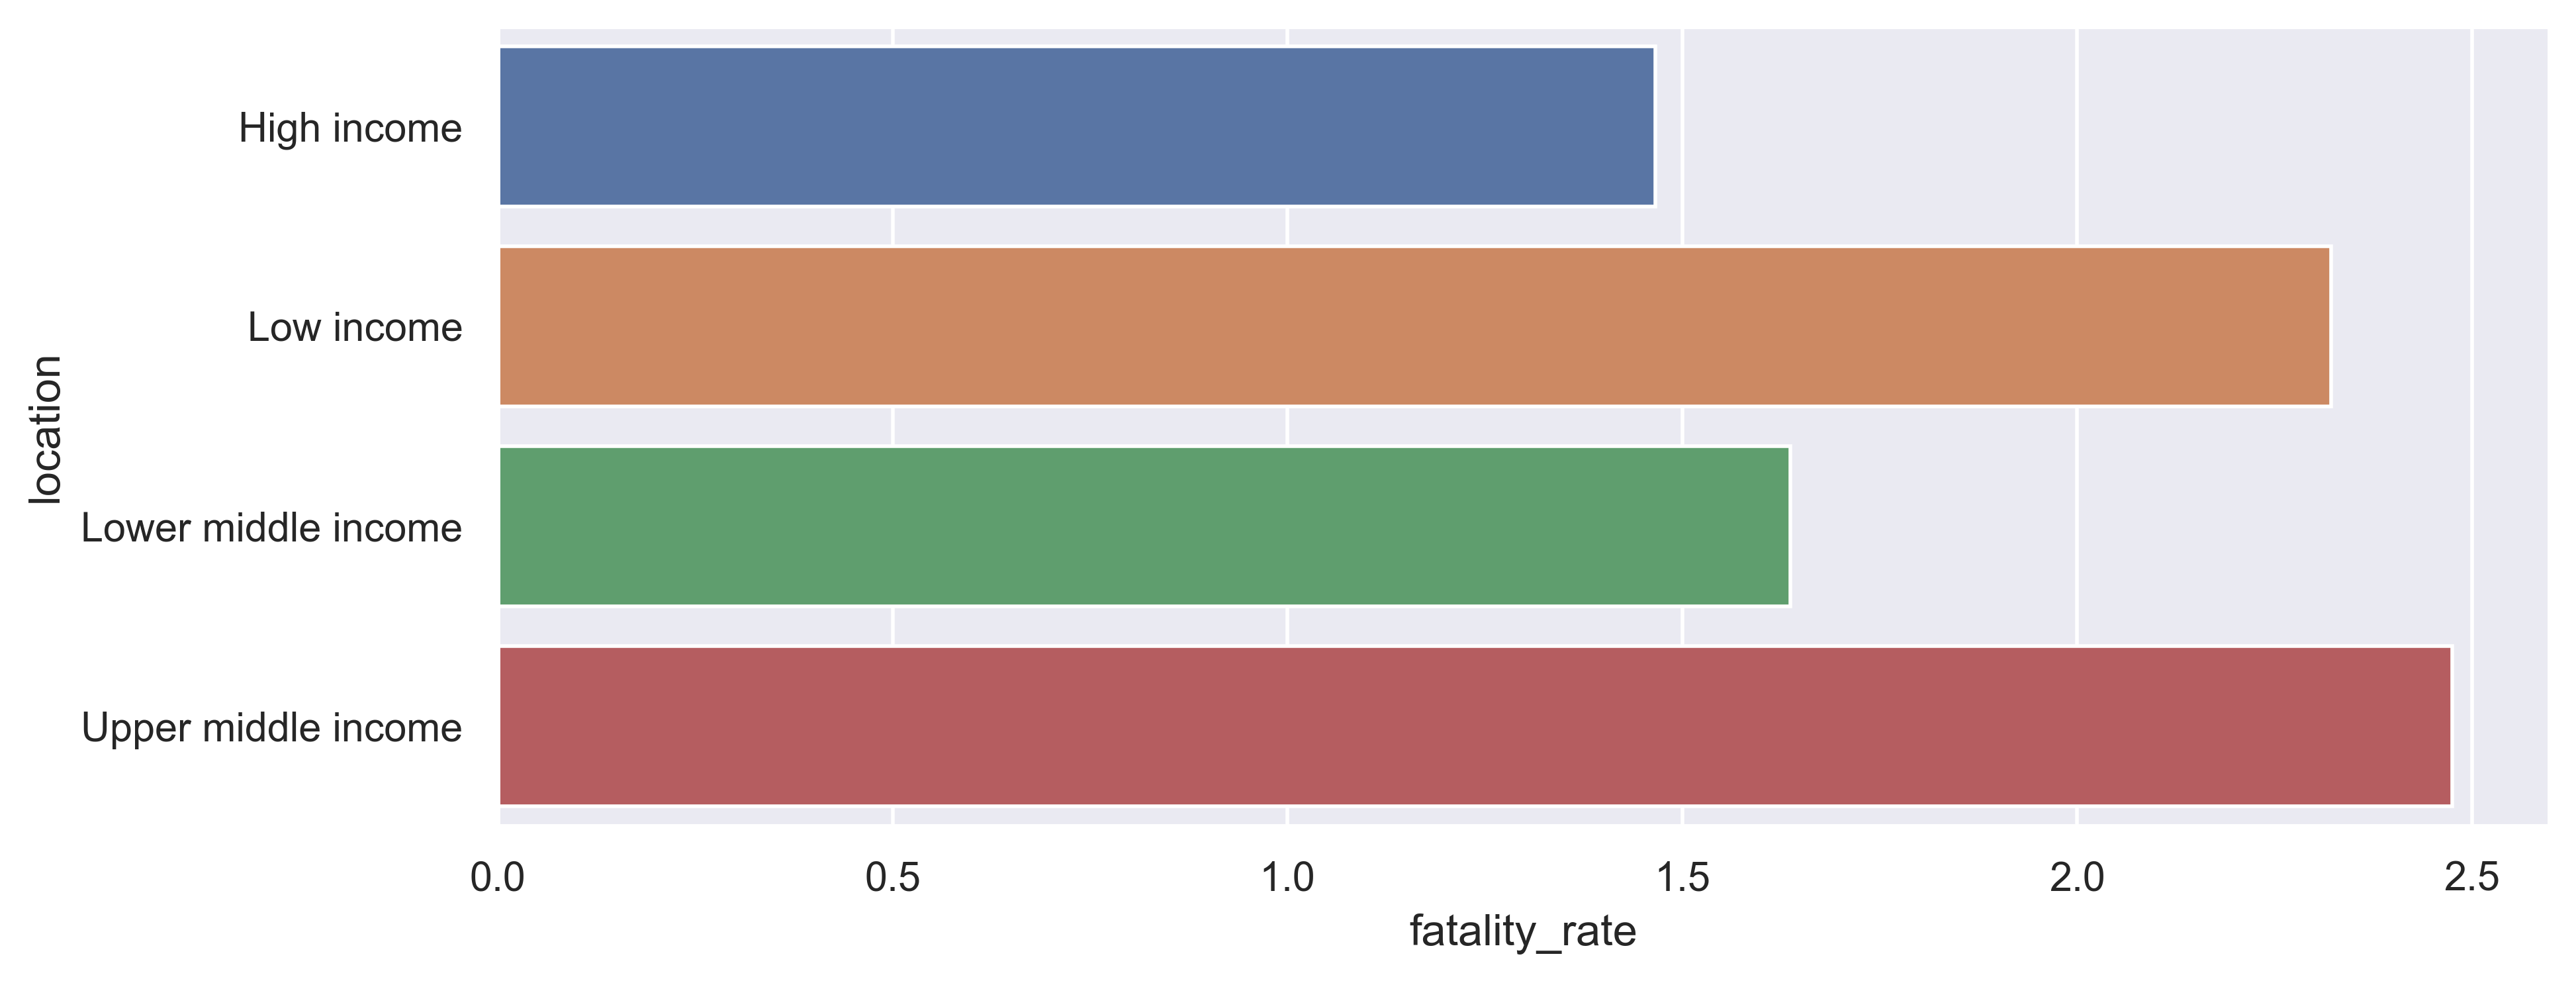

In [39]:
# create a bar chart

plt.figure(dpi = 400, figsize = (10,4))
sns.set(style = 'darkgrid')
sns.barplot(data = df_income.loc[df_income['date'] >= '2021-01-01'], y = 'location', x = 'fatality_rate', 
            palette = 'deep', ci = None)

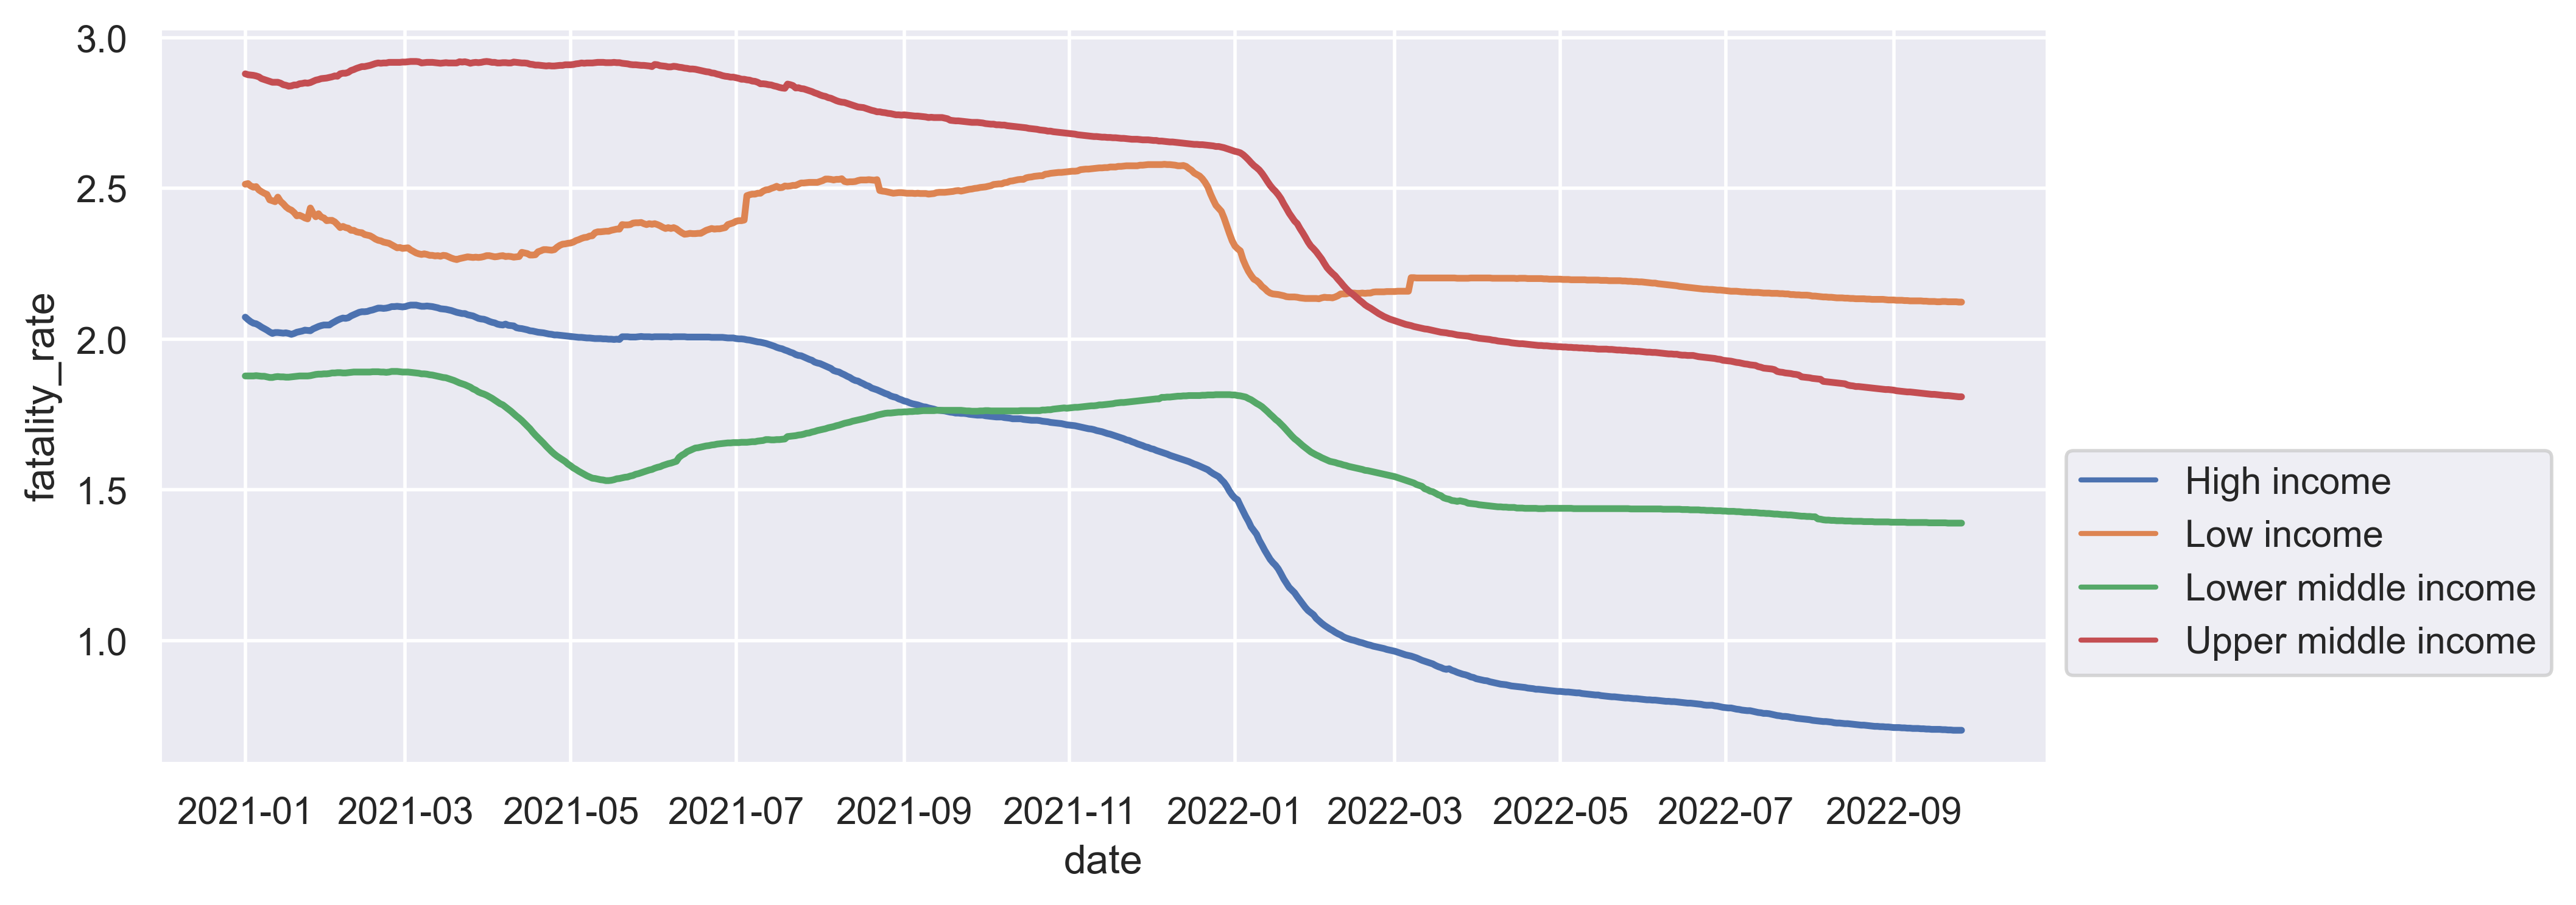

In [40]:
# plot a line chart

plt.figure(dpi = 400, figsize = (10,4))
sns.set(style = 'darkgrid')
sns.lineplot(data = df_income.loc[df_income['date'] >= '2021-01-01'], x = 'date', y = 'fatality_rate', hue = 'location', 
            palette = 'deep', ci = None, lw = 2)
plt.legend(loc = (1.01,0.12))

<AxesSubplot:xlabel='infection_rate', ylabel='location'>

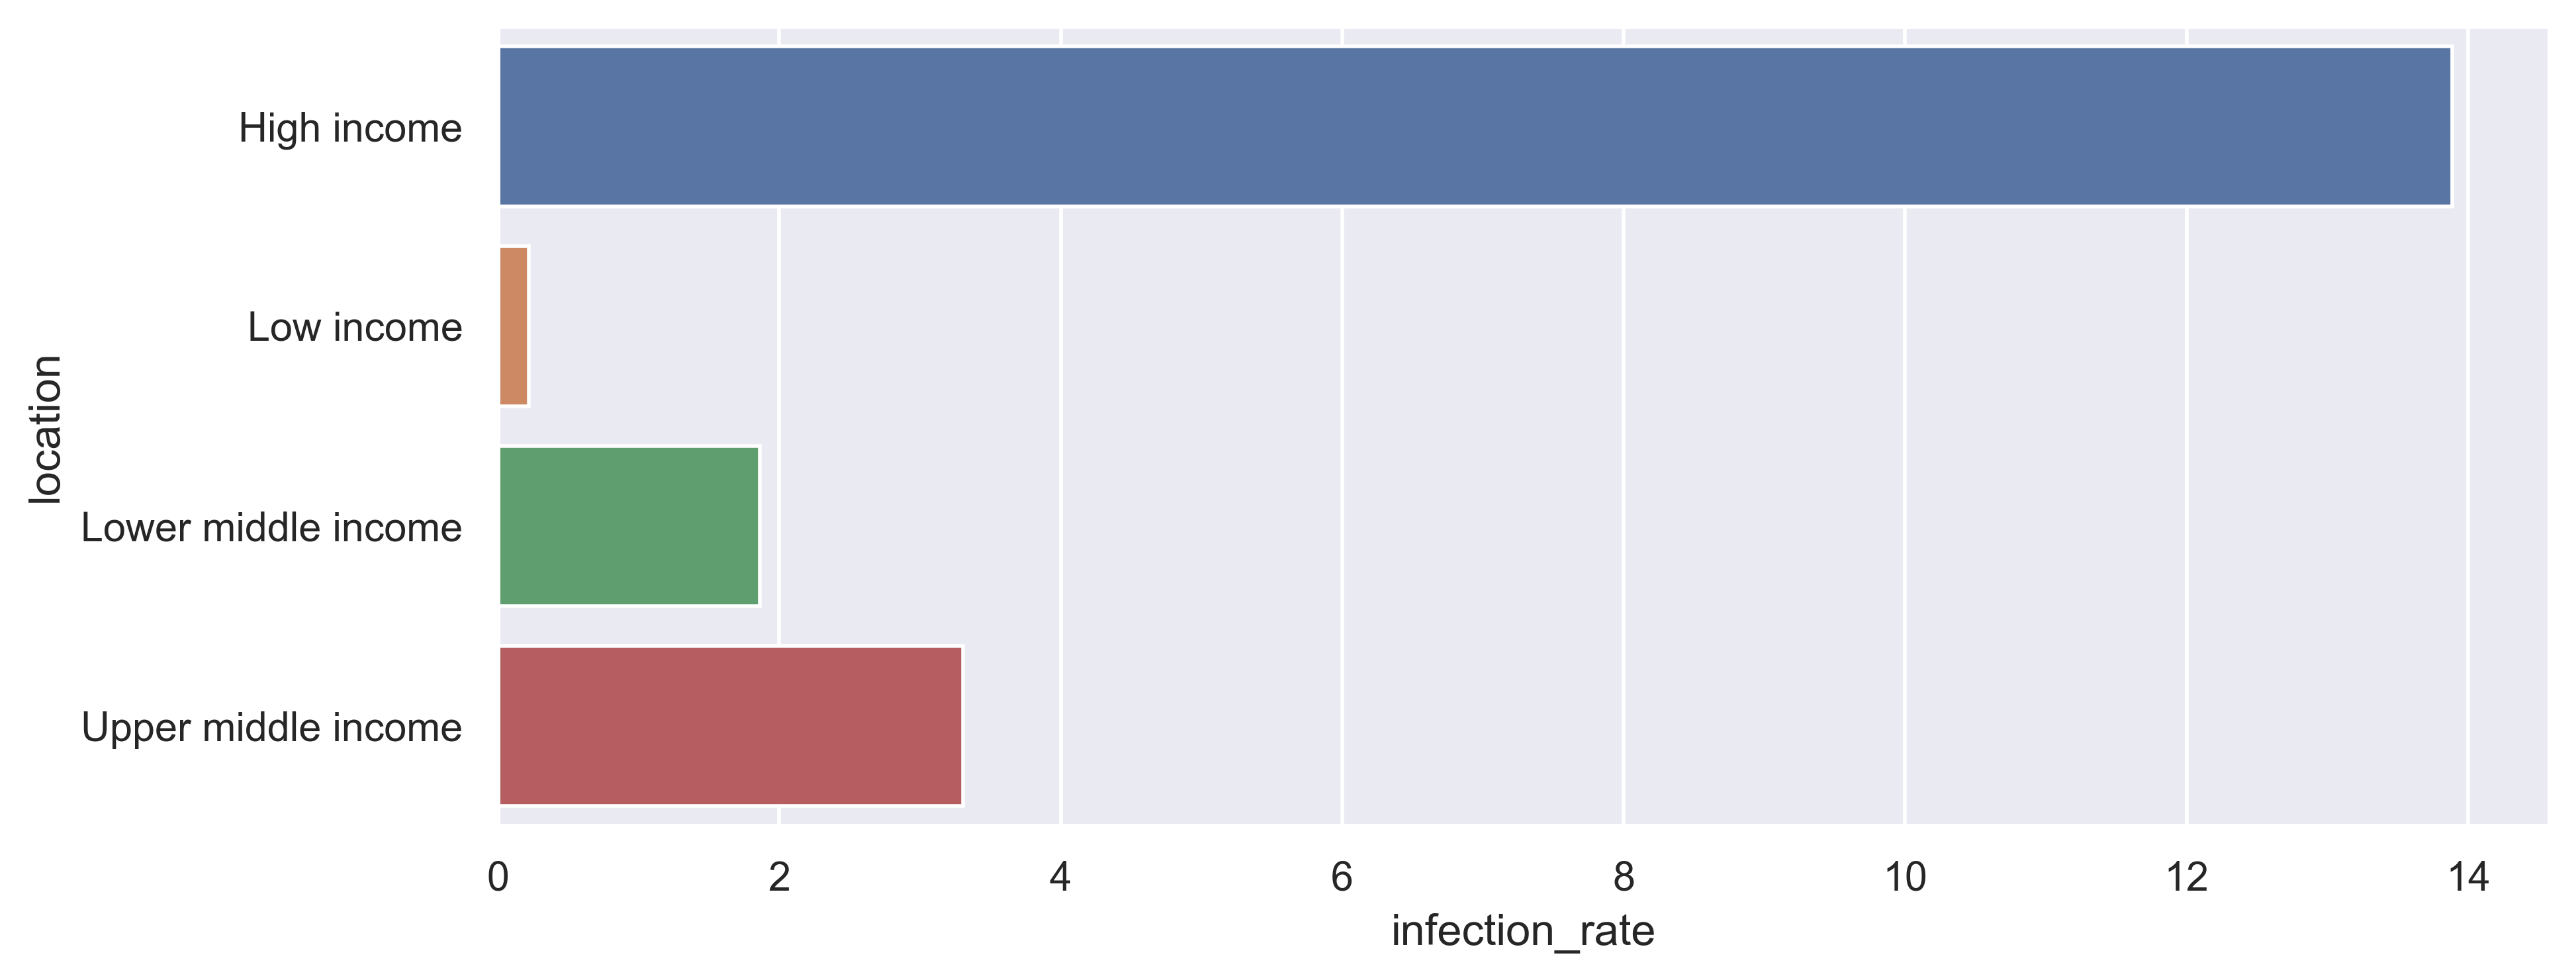

In [41]:
# create a bar chart

plt.figure(dpi = 400, figsize = (10,4))
sns.set(style = 'darkgrid')
sns.barplot(data = df_income.loc[df_income['date'] >= '2021-01-01'], y = 'location', x = 'infection_rate', 
            palette = 'deep', ci = None)

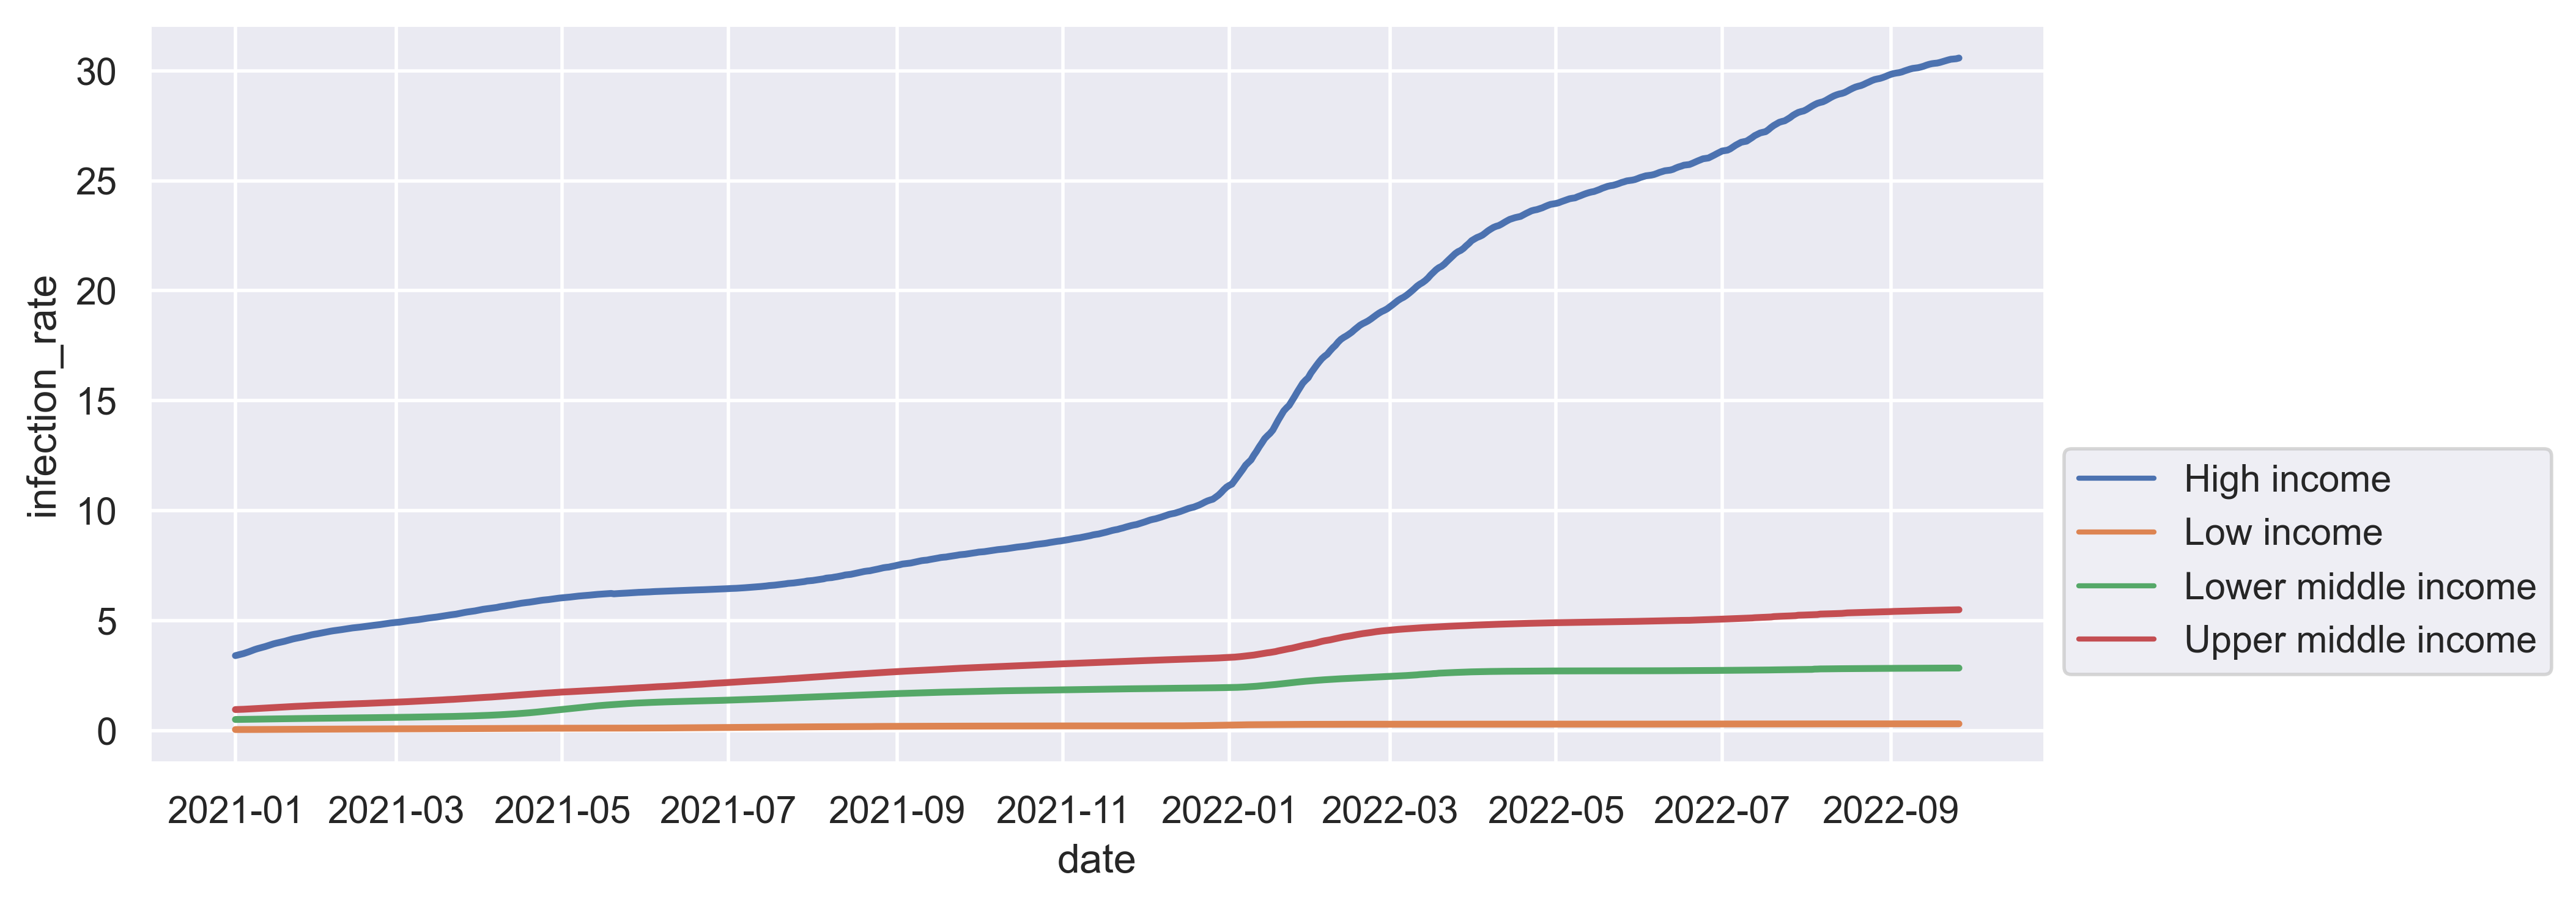

In [42]:
# plot a line chart

plt.figure(dpi = 400, figsize = (10,4))
sns.set(style = 'darkgrid')
sns.lineplot(data = df_income.loc[df_income['date'] >= '2021-01-01'], x = 'date', y = 'infection_rate', hue = 'location', 
            palette = 'deep', ci = None, lw = 2)
plt.legend(loc = (1.01,0.12))

In [43]:
df_income.loc[df_income['date'] >= '2021-01-01'].groupby('location').mean()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,year,month,weekday,fatality_rate,infection_rate
location,,,,,,,,,,,,,
High income,172375426.487382,531865.258675,1939351.304416,2810.422713,1608223093.175079,722419927.047319,6.336960e+08,1241374280.0,2021.42429,5.861199,3.004732,1.465610,13.885853
Low income,1542866.694006,2901.066246,35303.291798,59.16877,79396794.690722,55964451.773196,4.291958e+07,701926970.0,2021.42429,5.861199,3.004732,2.321181,0.219798
Lower middle income,62673022.801262,123258.623028,990224.413249,1580.041009,2199760723.170145,1198751326.317817,9.226270e+08,3363196660.0,2021.42429,5.861199,3.004732,1.637060,1.863476
Upper middle income,82699512.608833,179090.802839,1898577.974763,2814.012618,3107110191.097792,1342703296.138801,1.165745e+09,2501427940.0,2021.42429,5.861199,3.004732,2.474664,3.306088


In [44]:
# extract selected columns to a new data frame and set the index to the data frame

df_world_deaths = pd.DataFrame(data = df_world.set_index('date'), columns = ['new_deaths'])
df_world_deaths.index.freq = 'D'
df_world_deaths

,new_deaths
date,
2020-01-22,0
2020-01-23,1
2020-01-24,8
2020-01-25,16
2020-01-26,14
...,...
2022-09-22,2458
2022-09-23,1823
2022-09-24,741


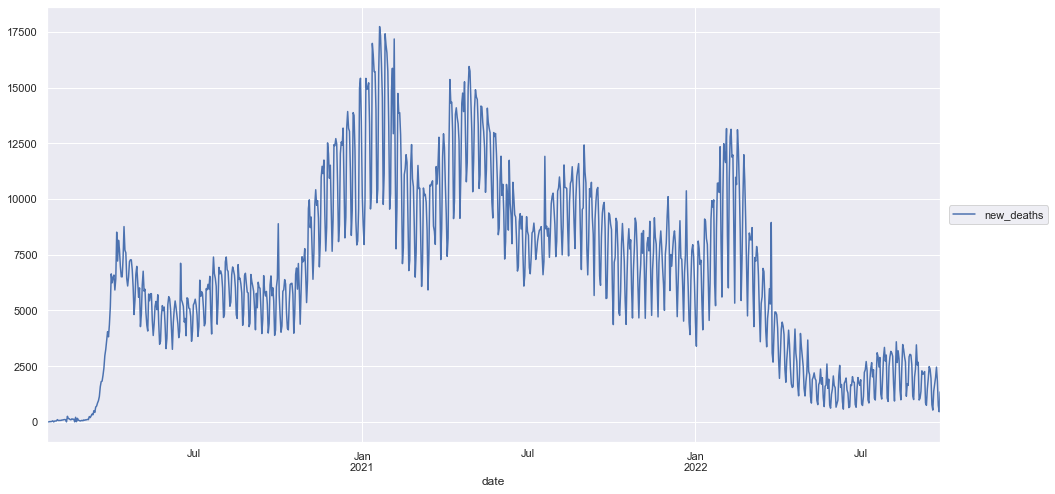

In [45]:
# plot a line graph

df_world_deaths.plot(figsize=(16,8))
plt.legend(loc = (1.01,0.5))

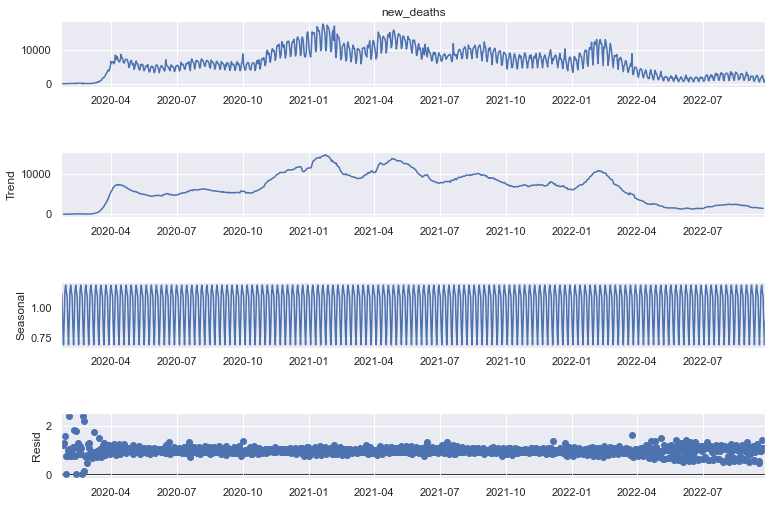

In [46]:
# decompose the time series

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mul = seasonal_decompose(x = df_world_deaths['new_deaths'].iloc[1:], model = 'multiplicative', period = 7)

fig = decompose_result_mul.plot()
fig.set_size_inches((12, 8))

In [47]:
# add new columns to the existing data frame

df_world_deaths['standardizing'] = (df_world_deaths['new_deaths'] - df_world_deaths.new_deaths.rolling(window = 7).mean()) / df_world_deaths.new_deaths.rolling(window = 7).std()
df_world_deaths['combination'] = df_world_deaths['standardizing'] - df_world_deaths['standardizing'].shift(7)
df_world_deaths['combination'] = df_world_deaths['combination'].astype(dtype='float64')
df_world_deaths.head(14)

,new_deaths,standardizing,combination
date,,,
2020-01-22,0,NaN,NaN
2020-01-23,1,NaN,NaN
2020-01-24,8,NaN,NaN
2020-01-25,16,NaN,NaN
2020-01-26,14,NaN,NaN
2020-01-27,26,NaN,NaN
2020-01-28,49,1.92247,NaN
2020-01-29,2,-0.871922,NaN
2020-01-30,39,1.001155,NaN


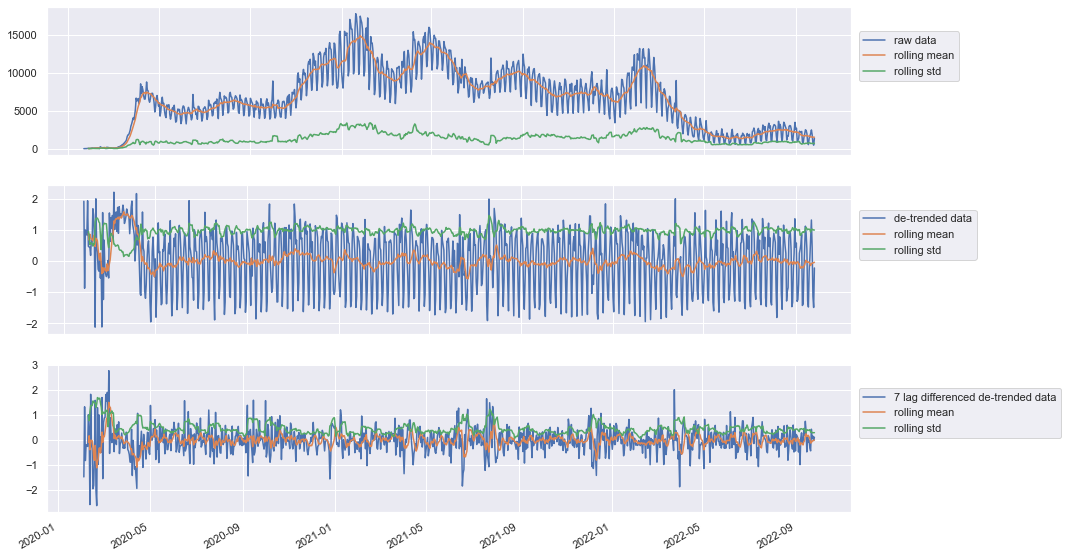

In [48]:
# plot rolling statistics

def plot_rolling(df_world_deaths):
    fig, ax = plt.subplots(3,figsize=(15, 9))
    ax[0].plot(df_world_deaths.index.to_numpy(), df_world_deaths.new_deaths.to_numpy(), label='raw data')
    ax[0].plot(df_world_deaths.index.to_numpy(), df_world_deaths.new_deaths.rolling(window=7).mean().to_numpy(), label="rolling mean");
    ax[0].plot(df_world_deaths.index.to_numpy(), df_world_deaths.new_deaths.rolling(window=7).std().to_numpy(), label="rolling std");
    ax[0].legend(loc = (1.01,0.5))

    ax[1].plot(df_world_deaths.index.to_numpy(), df_world_deaths.standardizing.to_numpy(), label="de-trended data")
    ax[1].plot(df_world_deaths.index.to_numpy(), df_world_deaths.standardizing.rolling(window=7).mean().to_numpy(), label="rolling mean");
    ax[1].plot(df_world_deaths.index.to_numpy(), df_world_deaths.standardizing.rolling(window=7).std().to_numpy(), label="rolling std");
    ax[1].legend(loc = (1.01,0.5))

    ax[2].plot(df_world_deaths.index.to_numpy(), df_world_deaths.combination.to_numpy(), label="7 lag differenced de-trended data")
    ax[2].plot(df_world_deaths.index.to_numpy(), df_world_deaths.combination.rolling(window=7).mean().to_numpy(), label="rolling mean");
    ax[2].plot(df_world_deaths.index.to_numpy(), df_world_deaths.combination.rolling(window=7).std().to_numpy(), label="rolling std");
    ax[2].legend(loc = (1.01,0.5))

    plt.tight_layout()
    fig.autofmt_xdate()

plot_rolling(df_world_deaths)

In [49]:
# Augmented Dickey-Fuller Test: stationary/seasonality checks

from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary?")
dftest = adfuller(df_world_deaths.new_deaths, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    
print("\n > Is the de-trended data stationary?")
adfuller(df_world_deaths.dropna()['standardizing'], autolag = 'AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
print("\n > Is the 7-lag differenced de-trended data stationary?")
dftest = adfuller(df_world_deaths.dropna()['combination'], autolag = 'AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

 > Is the data stationary?
Test statistic = -2.664
P-value = 0.080
Critical values :
	1%: -3.4372087295925664 - The data is not stationary with 99% confidence
	5%: -2.8645680048962348 - The data is not stationary with 95% confidence
	10%: -2.5683822785402914 - The data is  stationary with 90% confidence

 > Is the de-trended data stationary?
Test statistic = -2.664
P-value = 0.080
Critical values :
	1%: -3.4372087295925664 - The data is not stationary with 99% confidence
	5%: -2.8645680048962348 - The data is not stationary with 95% confidence
	10%: -2.5683822785402914 - The data is  stationary with 90% confidence

 > Is the 7-lag differenced de-trended data stationary?
Test statistic = -8.689
P-value = 0.000
Critical values :
	1%: -3.4372887850912175 - The data is  stationary with 99% confidence
	5%: -2.8646033071530703 - The data is  stationary with 95% confidence
	10%: -2.568401081996585 - The data is  stationary with 90% confidence


In [50]:
# split data into training and testing

n = 90
train = pd.DataFrame(data = df_world_deaths[1:np.round(len(df_world_deaths)*(n/100),0).astype(int)], columns = ['new_deaths'])
test = pd.DataFrame(data = df_world_deaths[len(train) + 1:], columns = ['new_deaths'])

print(train.tail())
print(test.head())

            new_deaths
date                  
2022-06-16        1433
2022-06-17        1298
2022-06-18         643
2022-06-19         680
2022-06-20        1664
            new_deaths
date                  
2022-06-21        1632
2022-06-22        2032
2022-06-23        1793
2022-06-24        1780
2022-06-25         782


In [51]:
# set the value of Alpha and define m (time = period)

m = 7
alpha = 1/(2*m)

In [52]:
# fit the data with exponential smoothing time series forecasting methods

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

HSES_model = SimpleExpSmoothing(endog = np.asarray(train['new_deaths'])).fit(smoothing_level = alpha, optimized = False, use_brute=True)

HES1_add_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'add').fit()
HES1_mul_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'mul').fit()

HES2_add_damped_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'add', damped_trend = True).fit()
HES2_mul_damped_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'mul', damped_trend = True).fit()

HWES1_add_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'add', seasonal = 'add', seasonal_periods = 7).fit()
HWES1_mul_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'mul', seasonal = 'mul', seasonal_periods = 7).fit()

HWES2_add_damped_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'add', seasonal = 'add', seasonal_periods = 7, damped_trend = True).fit()
HWES2_mul_damped_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = 'mul', seasonal = 'mul', seasonal_periods = 7, damped_trend = True).fit()

HWES3_no_trend_add_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = None, seasonal = 'add', seasonal_periods = 7).fit()
HWES3_no_trend_mul_model = ExponentialSmoothing(endog = np.asarray(train['new_deaths']), trend = None, seasonal = 'mul', seasonal_periods = 7).fit()

test['HSES'] = HSES_model.forecast(len(test))

test['HES1_add'] = HES1_add_model.forecast(len(test))
test['HES1_mul'] = HES1_mul_model.forecast(len(test))

test['HES2_add_damped'] = HES2_add_damped_model.forecast(len(test))
test['HES2_mul_damped'] = HES2_mul_damped_model.forecast(len(test))

test['HWES1_add'] = HWES1_add_model.forecast(len(test))
test['HWES1_mul'] = HWES1_mul_model.forecast(len(test))

test['HWES2_add_damped'] = HWES2_add_damped_model.forecast(len(test))
test['HWES2_mul_damped'] = HWES2_mul_damped_model.forecast(len(test))

test['HWES3_no_trend_add'] = HWES3_no_trend_add_model.forecast(len(test))
test['HWES3_no_trend_mul'] = HWES3_no_trend_mul_model.forecast(len(test))

C:\Users\reezal93\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\reezal93\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\reezal93\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\reezal93\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\reezal93\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\reezal93\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimizat

In [53]:
# choose the best model based on Akaike Information Criterion

print ('Results of AIC test:')

print('1. HSES: AIC = '+str(np.round(HSES_model.aic,2)))

print('2. HES1 ADD: AIC = '+str(np.round(HES1_add_model.aic,2)))
print('3. HES1 MUL: AIC = '+str(np.round(HES1_mul_model.aic,2)))

print('4. HES2 ADD DAMPED: AIC = '+str(np.round(HES2_add_damped_model.aic,2)))
print('5. HES2 MUL DAMPED: AIC = '+str(np.round(HES2_mul_damped_model.aic,2)))

print('6. HWES1 ADD: AIC = '+str(np.round(HWES1_add_model.aic,2)))
print('7. HWES1 MUL: AIC = '+str(np.round(HWES1_mul_model.aic,2)))

print('8. HWES2 ADD DAMPED: AIC = '+str(np.round(HWES2_add_damped_model.aic,2)))
print('9. HWES2 MUL DAMPED: AIC = '+str(np.round(HWES2_mul_damped_model.aic,2)))

print('10. HWES3 NO TREND ADD: AIC = '+str(np.round(HWES3_no_trend_add_model.aic,2)))
print('11. HWES3 NO TREND MUL: AIC = '+str(np.round(HWES3_no_trend_mul_model.aic,2)))

Results of AIC test:
1. HSES: AIC = 13195.2
2. HES1 ADD: AIC = 12929.65
3. HES1 MUL: AIC = 13445.05
4. HES2 ADD DAMPED: AIC = 12931.63
5. HES2 MUL DAMPED: AIC = 15606.68
6. HWES1 ADD: AIC = 11755.89
7. HWES1 MUL: AIC = 11756.76
8. HWES2 ADD DAMPED: AIC = 11748.7
9. HWES2 MUL DAMPED: AIC = 11738.76
10. HWES3 NO TREND ADD: AIC = 11772.22
11. HWES3 NO TREND MUL: AIC = 11694.18


In [54]:
# estimate the accuracy of the forecasting model's predicted values

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['new_deaths'], test['HWES3_no_trend_mul'])
rmse = np.sqrt(mse)

print('RMSE: %f' % rmse)
print("Mean of testing set: % s" %(test.new_deaths.mean()))
print("Standard deviation of testing set: % s" %(test.new_deaths.std()))

RMSE: 774.180403
Mean of testing set: 1981.8061224489795
Standard deviation of testing set: 821.5229716519312


C:\Users\reezal93\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


<AxesSubplot:xlabel='date'>

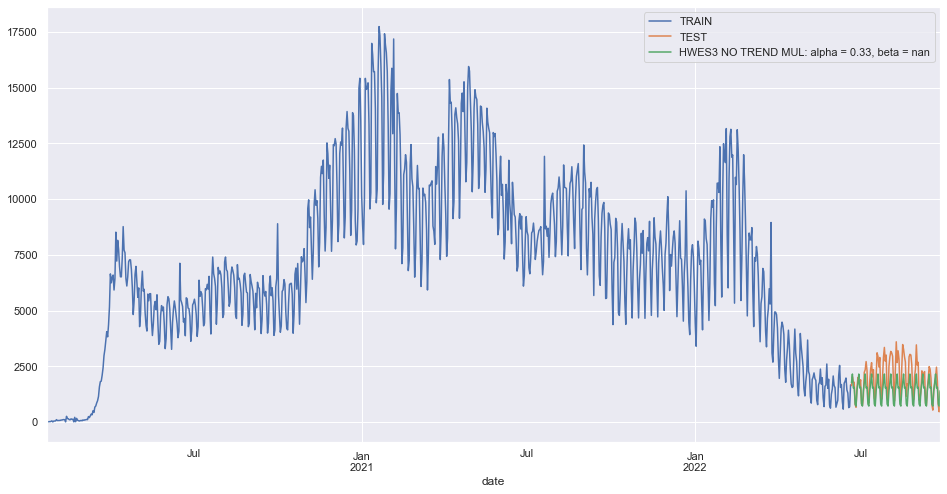

In [55]:
# fit a Holt-Winter’s Seasonal Smoothing model

train['new_deaths'].plot(legend=True,label='TRAIN', figsize = (16,8))
test['new_deaths'].plot(legend=True, label = 'TEST')
test['HWES3_no_trend_mul'].plot(legend=True, label="HWES3 NO TREND MUL: alpha = "+str(HWES3_no_trend_mul_model.params['smoothing_level'])[:4]+", beta = "+str(HWES3_no_trend_mul_model.params['smoothing_trend'])[:4])

In [56]:
# adjust periods forward to forecast using the forecast function

from datetime import datetime, timedelta

days = 59
first_date = pd.to_datetime('2022-09-27', dayfirst = True)

forecast_days = pd.date_range(first_date, first_date + timedelta(days), freq='D')

forecast = pd.DataFrame({'date': forecast_days})
forecast = forecast.set_index('date')
forecast.index.freq = 'D'

C:\Users\reezal93\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


<AxesSubplot:xlabel='date'>

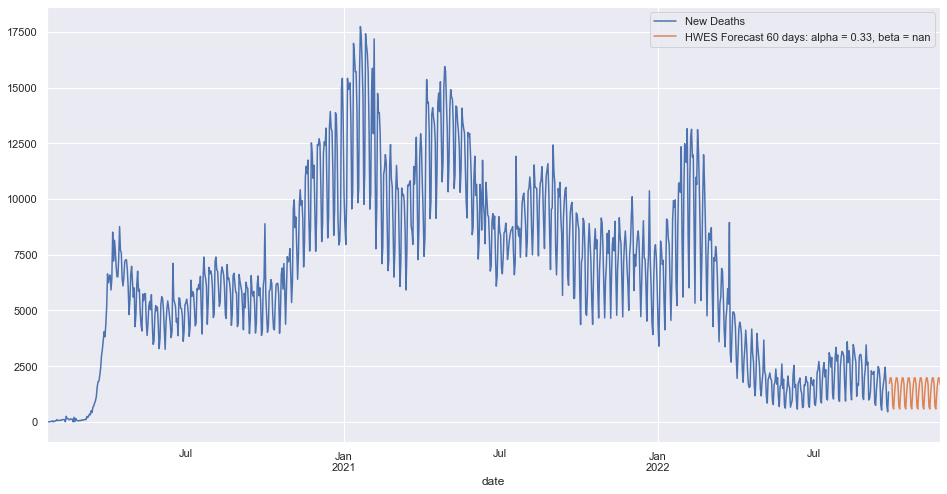

In [57]:
# fit and forecast

final_model = ExponentialSmoothing(np.asarray(df_world_deaths['new_deaths'].iloc[1:]), trend = None, seasonal = 'mul', seasonal_periods = 7).fit()
forecast['HWES_no_trend_mul_forecast'] = final_model.forecast(60)

df_world_deaths['new_deaths'].plot(legend = True, label = 'New Deaths', figsize = (16,8))
forecast['HWES_no_trend_mul_forecast'].plot(legend=True, label = "HWES Forecast 60 days: alpha = "+str(final_model.params['smoothing_level'])[:4]+", beta = "+str(final_model.params['smoothing_trend'])[:4])